Bolded text = **do not change**

Italics text = *replace with your own words*


******************
*******************

# **Description of data**

The orginal dataset has global vaccinaiton data for covid-19 by dates including total number of vaccinations, daliy vaccinations and so on. The dataset contains 15 columns and 17607 rows. One of the goals of this analysis is forming a prediction model for a daily vaccination doses needed, after finding a strongly correlated variable. This is crucial since the production and testing of a vaccine are time consuming and prone to unvertainties while vaccines rollout requires an efficient plan. And having a clear vision of a reasonable daily number of doses allows for better preperation. Hence, a regression model will be performed to generate specific information to forecast vaccine doese needed for Covid-19 and other similar scenarioes.
Another purpose of the project contains the analysis of vaccine distribution in China. China, reported by news and other resources, is one of the most efficient countries when it comes to vaccine control and vaccine distribution. The success results from mandated testing and high level of government involvement. However, given the unique social dynamic in China, its virus coping strategy can be hardly repeated in other regions. Thus, the high rates of vaccines administration in China and those similar are unlikely to happen and should be held out when developing a geenralization model. A classification model will be performed to address this issue.

*******************
*******************
# **Libraries**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

*******************
*******************
# **Functions used in notebook**

*If you write a function to help with any of your sections, please put that function here*

In [ ]:
# Functions that you develop

# function to turn date to an integer
# can be used to get the latest entry
def date_to_int(input_):
  input_ = input_.replace('-','')
  return input_


*******************
*******************
# **Getting data**

*Provide Pseudocode*
1. Getting the data
2. Showing the head of the data
3. Showing the tail of the data
4. Showing more details of the data using .info() method
5. Showing more details of the data using .describe() method


In [ ]:
# Code for acquiring data
# loading csv file to notebook using read_csv
all_vac = pd.read_csv('country_vaccinations.csv')

In [ ]:
# Display first 5 rows of data
all_vac.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
# Display last 5 rows of data
all_vac.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
17602,Zimbabwe,ZWE,2021-05-08,657838.0,509274.0,148564.0,17076.0,19648.0,4.43,3.43,1.00,1322.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17603,Zimbabwe,ZWE,2021-05-09,684243.0,526066.0,158177.0,26405.0,22863.0,4.60,3.54,1.06,1538.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17604,Zimbabwe,ZWE,2021-05-10,690653.0,529360.0,161293.0,6410.0,21877.0,4.65,3.56,1.09,1472.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17605,Zimbabwe,ZWE,2021-05-11,709772.0,539526.0,170246.0,19119.0,21428.0,4.78,3.63,1.15,1442.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
17606,Zimbabwe,ZWE,2021-05-12,730365.0,549797.0,180568.0,20593.0,22019.0,4.91,3.70,1.21,1481.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...


In [ ]:
# Show data.info
# we can see a lot of the columns have missing data. They will be dealt with in feature engineering
all_vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17607 entries, 0 to 17606
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              17607 non-null  object 
 1   iso_code                             17607 non-null  object 
 2   date                                 17607 non-null  object 
 3   total_vaccinations                   10251 non-null  float64
 4   people_vaccinated                    9526 non-null   float64
 5   people_fully_vaccinated              7185 non-null   float64
 6   daily_vaccinations_raw               8568 non-null   float64
 7   daily_vaccinations                   17391 non-null  float64
 8   total_vaccinations_per_hundred       10251 non-null  float64
 9   people_vaccinated_per_hundred        9526 non-null   float64
 10  people_fully_vaccinated_per_hundred  7185 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
# Show data.describe
all_vac.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.025100e+04,9.526000e+03,7.185000e+03,8.568000e+03,1.739100e+04,10251.000000,9526.000000,7185.000000,17391.000000
mean,5.716299e+06,3.500000e+06,1.817309e+06,1.445607e+05,7.941384e+04,17.199317,12.341277,6.403328,3031.492094
std,2.399767e+07,1.313534e+07,7.875693e+06,5.906624e+05,3.837504e+05,24.719775,16.087866,10.620806,4639.012478
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.450950e+04,5.595875e+04,2.520600e+04,3.176000e+03,8.520000e+02,1.500000,1.390000,0.700000,355.000000
50%,4.701090e+05,3.617215e+05,1.920300e+05,1.674100e+04,5.974000e+03,7.170000,5.620000,2.670000,1523.000000
75%,2.154874e+06,1.491252e+06,7.725270e+05,6.590250e+04,3.005350e+04,22.565000,17.017500,7.470000,4122.500000
max,3.669100e+08,1.546242e+08,1.189873e+08,1.263800e+07,9.882286e+06,220.400000,114.950000,105.460000,118759.000000


***************
***************
# **Visualizing data**
Visualization 1 is a pairplot showing all the possible strong correlated variables.
* *We can see that "people_vaccinated" and "daily vaccinations" show strong correlation, as well as "total_vaccinations" and "daily vaccinations"*



Visualization 2 is a scatterplot of "total_vaccinations" and "daily vaccinations"



*Visualization 3 plots the distribution of daily_vaccinations.*


*  *The distribution is clustered at a small area, showing a possible constant growth in people getting vaccinated day by day.*

*Visualization 4 shows the missing data on a heatmap*

*Visualization 5 is plotting a boxplot to see the distribution of total vaccinations*
* It might look like outliers should addressed, but the data is longitudinal. Further adjustment to data will be discussed below in the feature engineering session.

Visualization 6 is a pairplot of the raw data with dummy coded column which categorizes data from China as category 1 and the others as 0
* In many cases, data from China and the others form two distinguishing groups of data points.

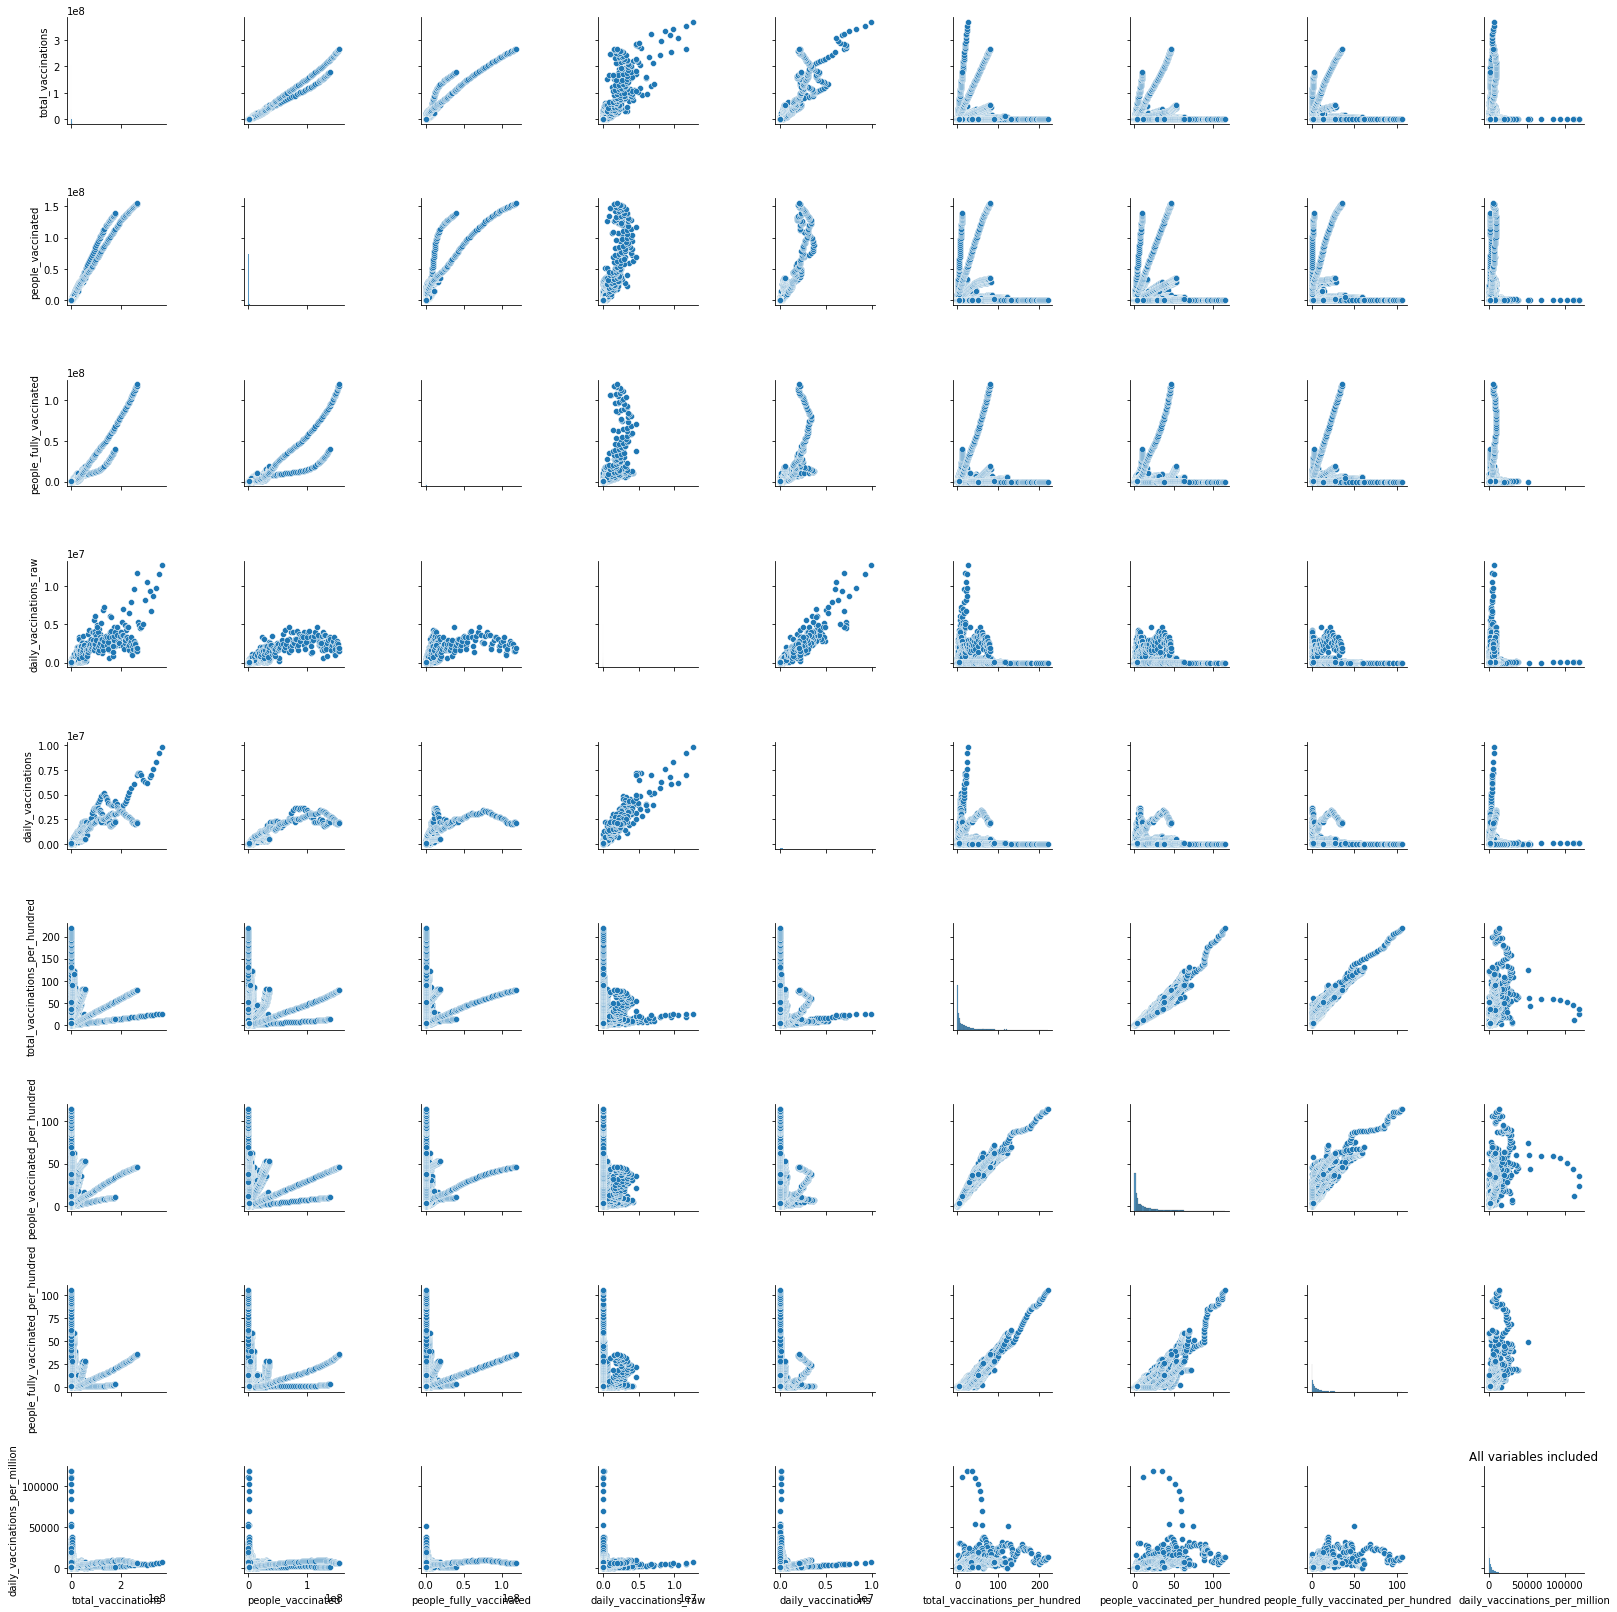

In [ ]:
# visualization 1
# a general glance at the data
sns.pairplot(all_vac)
plt.title('All variables included')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'daily vaccines distributed')

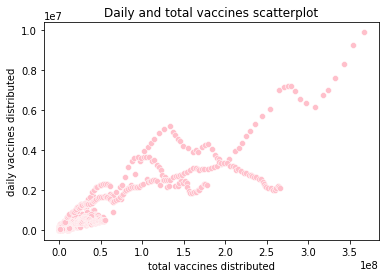

In [ ]:
# visualization 2
# ploting a scatterplot for total vaccinations administrated against daily vaccinations
sns.scatterplot(all_vac['total_vaccinations'],all_vac['daily_vaccinations'],color = 'pink') 
plt.title('Daily and total vaccines scatterplot')
plt.xlabel('total vaccines distributed')
plt.ylabel('daily vaccines distributed')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of daily number of vaccines distributed')

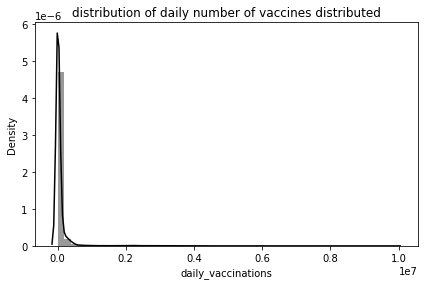

In [ ]:
# visualization 3
# plotting to show the distribution of the number of daily vaccinations
sns.distplot(all_vac['daily_vaccinations'],color ='black')
plt.tight_layout()
plt.title('distribution of daily number of vaccines distributed')

Text(0.5, 1.0, 'missing values of the dataset')

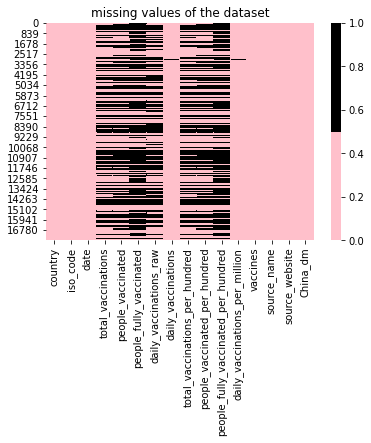

In [ ]:
# visualization 4
# plotting a heatmap to show the missing data in each column
sns.heatmap(all_vac.isnull(),cmap=['pink', 'black'])
plt.title('missing values of the dataset')

Text(0.5, 1.0, 'longitudinal distribution of total vaccines administered')

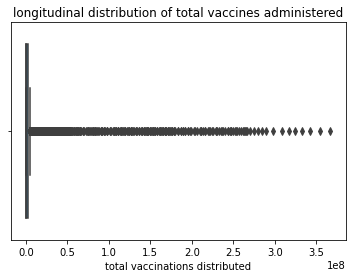

In [ ]:
# visualization 5
sns.boxplot(x = 'total_vaccinations',data= all_vac)
plt.xlabel('total vaccinations distributed')
plt.title('longitudinal distribution of total vaccines administered')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


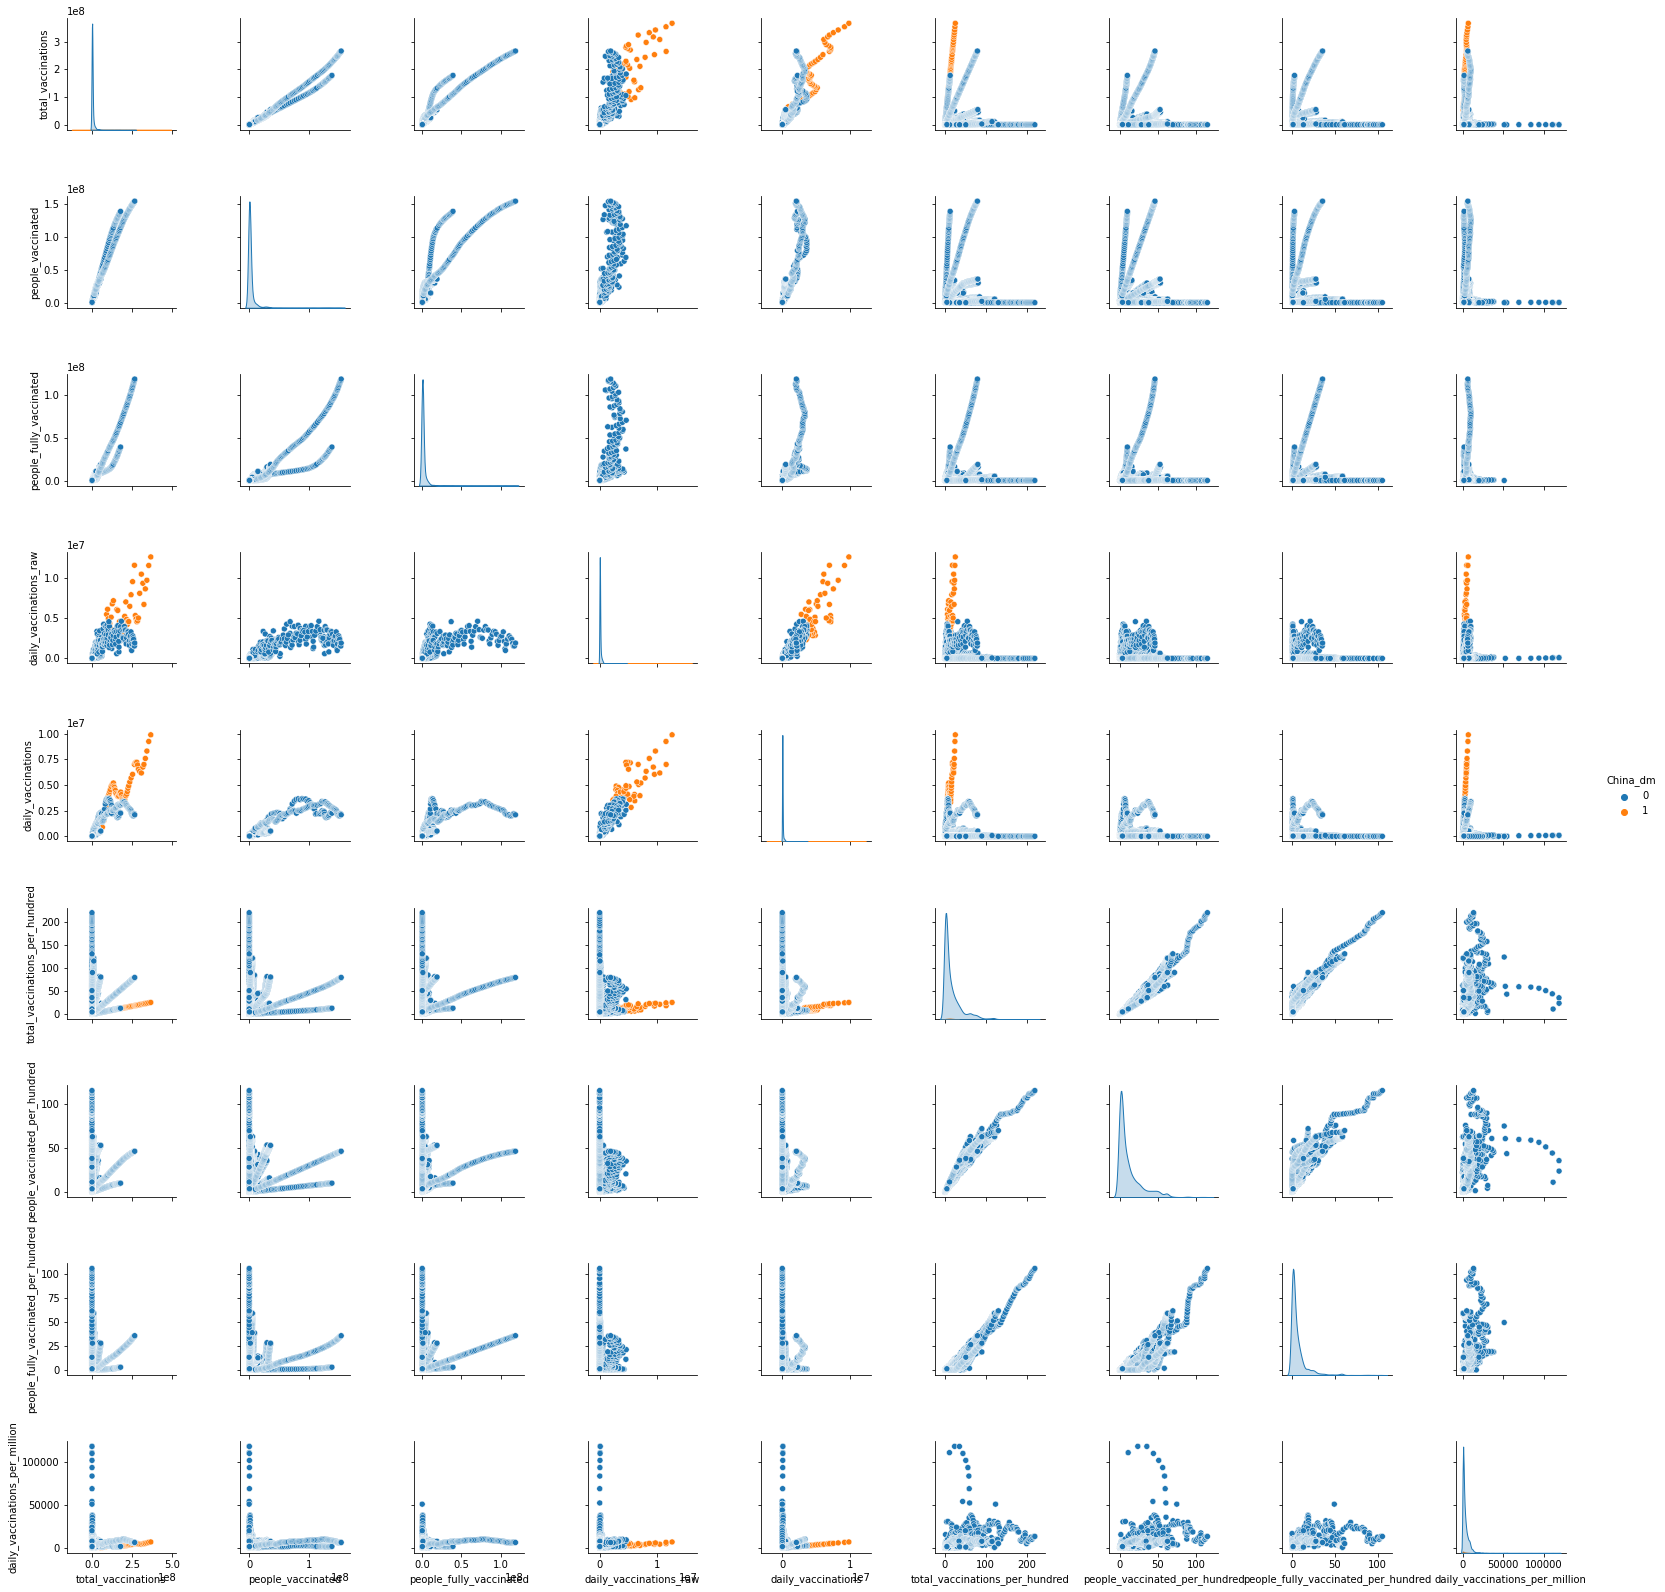

In [ ]:
# visualization 6
# Dummy coding the row entries based on whether it is data from China (1 = from China)
dum_col = np.where(all_vac['country']=='China',1,0)
# Append the dummy coded column to dataframe
all_vac['China_dm'] = dum_col
sns.pairplot(data = all_vac,hue = 'China_dm')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'daily vaccines distributed')

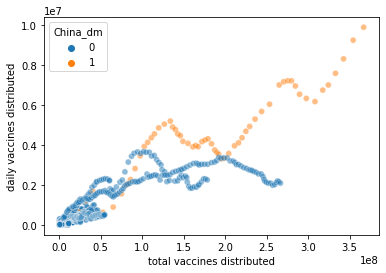

In [ ]:
# visualization 7 
# a catterplot that shows the discrepency between the number of vaccinations distributed in China and the rest of the world.
sns.scatterplot(all_vac['total_vaccinations'],all_vac['daily_vaccinations'],hue = all_vac['China_dm'],alpha = 0.5)
plt.xlabel('total vaccines distributed')
plt.ylabel('daily vaccines distributed')

***************
***************
# **Feature Engineering**

*If making specific choices (e.g., binning data, dummy coding, etc), please describe what you plan to do here*

*Provide relevant pseudocode*
1. Getting panel data of the top 20 countries with the most number of "total_vaccinaitons"
2. Getting rid of the nulls and duplicates if needed
3. Dropping the irrelevant columns
4. Making a new dataset without data from China (all_vac_4) 
5. Dummy coding the country column


In [ ]:
# Some steps before feature engineering
# I put data selection first to select the top 20 countries with the most number of "total_vaccinations"
# Since I am developing a prediction model for daily doses of vaccination needed for a certain total number of vaccinations administered
# Top 20 would be helpful and representative because they are the most efficient regions when it comes to vaccine distribution

# using the predefined function to change date to int, so they are easier to sort 
all_vac['date'] = all_vac.get('date').apply(date_to_int)

# Initializing the first row. The latest entry for Afghanistan
max = all_vac[all_vac['country'] == 'Afghanistan'].get('date').max()
result = all_vac[all_vac['country'] == 'Afghanistan'][all_vac['date'] == max]

# Using a for-loop to get the latest row entry for all countries
for country in all_vac['country'].unique():
  max = all_vac[all_vac['country'] == country].get('date').max() # getting the latest date
  result_1 = all_vac[all_vac['country'] == country][all_vac['date'] == max] # getting the row 
  result = result.append(result_1) # append the row to the existing dataframe

# get the top 20 countries with the most total vaccinations administered 
top_20 = result.sort_values(by = 'total_vaccinations',ascending=False)[:20]

# put the country names in an array
top_20_array = np.array(top_20['country'])

# indexing all the entries from the original dataframe 'all_vac" fir the first country in the array 
new_vac = all_vac[all_vac['country'] == top_20_array[0]]

# looping through the second to the last country names in the array
for i in top_20_array[1:]:
  new = all_vac[all_vac['country'] == i] 
  new_vac = new_vac.append(new) # append the new dataframe with a certain country's row entries to new_vac

# reseting the index for the new_vac dataframe
new_vac = new_vac.reset_index().drop(columns = 'index')

# show the head of the new dataframe
print('============================================= top 20 countries first five rows =============================================')
new_vac.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


============================================= top 20 countries first five rows =============================================


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,China_dm
0,China,CHN,20201215,1500000.0,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/3d1e04...,1
1,China,CHN,20201216,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/3d1e04...,1
2,China,CHN,20201217,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/3d1e04...,1
3,China,CHN,20201218,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/3d1e04...,1
4,China,CHN,20201219,NaN,NaN,NaN,NaN,187500.0,NaN,NaN,NaN,130.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202105/3d1e04...,1


In [ ]:
# Check and take care of null values

# check to see if there is any missing data
# visualizing rows with nan
print("====== null ======")
print(new_vac.isnull().any(axis=1))

# drop rows with more than 4 nans 
new_vac_2 = new_vac.dropna(thresh=new_vac.shape[1]-4)

# drop rows with missing values in columns "daily_vaccinations" and "total_vaccinations"
new_vac_2 = new_vac_2.drop(labels = new_vac_2[new_vac_2['daily_vaccinations'].isnull() == True].index,axis = 0)

new_vac_2 = new_vac_2.drop(labels = new_vac_2[new_vac_2['total_vaccinations'].isnull() == True].index,axis = 0)
print('==================================== data size after dropping null values ==================================== ')
print(new_vac_2.shape)

# data has no duplicate
print('============== any duplicate? ============')
new_vac_2.duplicated().any()

====== null ======
0        True
1        True
2        True
3        True
4        True
        ...  
2693    False
2694    False
2695    False
2696    False
2697    False
Length: 2698, dtype: bool
==================================== data size after dropping null values ==================================== 
(2283, 16)
============== any duplicate? ============


False

In [ ]:
# Check and take care of string values
print(new_vac_2.info()) # 6 columns are not numbers
# dropping the columns that are irrelevent to our analysis
new_vac_3 = new_vac_2.drop(columns = ['iso_code','source_website','source_name'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2283 entries, 98 to 2697
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2283 non-null   object 
 1   iso_code                             2283 non-null   object 
 2   date                                 2283 non-null   object 
 3   total_vaccinations                   2283 non-null   float64
 4   people_vaccinated                    1977 non-null   float64
 5   people_fully_vaccinated              1793 non-null   float64
 6   daily_vaccinations_raw               2180 non-null   float64
 7   daily_vaccinations                   2283 non-null   float64
 8   total_vaccinations_per_hundred       2283 non-null   float64
 9   people_vaccinated_per_hundred        1977 non-null   float64
 10  people_fully_vaccinated_per_hundred  1793 non-null   float64
 11  daily_vaccinations_per_millio

In [ ]:
new_vac_4 = new_vac_3.drop(labels = new_vac_3[new_vac_3['country'] == 'China'].index,axis = 0)

In [ ]:
# Any additional feature engineering

# The dataframe, in descending order by "total_vaccinations", shows that China takes up the top ranks regardless of the dates.
# Therefore, a model that predicts whether the data is from China given the number of "total_vaccination" can be useful.
# Dummy coding the row entries based on whether it is data from China (1 = from China)
dum_col = np.where(new_vac_3['country']=='China',1,0)
# Append the dummy coded column to dataframe
new_vac_3['China_dm'] = dum_col

# indexing the rows from china
china = new_vac_3[new_vac_3['China_dm'] ==1]
# indexing the rows not from china
not_china = new_vac_3[new_vac_3['China_dm'] == 0]
# randomly selecting five times as the number of rows in "china" from the not china rows to make the data more evenly distributed in two categories
not_china_sample = not_china.sample(china.shape[0]*3)
# make a new dataframe with the randomized rows and original rows with data from China.
new_vac_5 = china.append(not_china_sample)

***************
***************
# **Analysis section**

Machine Learning 1
* Polynomial regression on columns "total_vaccinations" and "daily_vaccinations"
* Only implementing single seperation of the data because cross validation methods such as K-Fold are not friendly to panel/longitudinal data as the some splits can include data from various time line but simplt testing and training split can better reserve the original trend of the data.

Machine Learning 2 
* Decision Tree model on categorical column (dummy coded) "China_dm" and numerical column "daily_vaccinations"
* Cross validation using k-fold.
* part one of Machine Learning 2 passes all the rows into the model, and there are more than 2000 rows that satisfy "China_dm" == 0 when only a little more than 50 rows that satisfy "China_dm" == 1. 
* part two contains only a subset of data that satisfy "China_dm" == 0 are passed into the data to counter the skewness. 



## Machine learning 1

In [ ]:
# Machine Learning 1
# new_vac_4, the subset that excludes data from China, will be used 
# because there is a large disconenction between data from China and data from other regions
print('The mean of total_vaccinations')
print(np.mean(new_vac_4['total_vaccinations']))
print('The standard deviation of total_vaccinations')
print(new_vac_4['total_vaccinations'].std())
# The standard deviation and mean of "daily _vaccinations" suggest that the number of vaccinations is not consistent everyday
# The number of daily doeses administered changes in cerntain pattern 
print('The mean of daily_vaccinations')
print(np.mean(new_vac_4['daily_vaccinations']))
print('The standard deviation of daily_vaccinations')
print(new_vac_4['daily_vaccinations'].std())

The mean of total_vaccinations
18597623.28283281
The standard deviation of total_vaccinations
36511894.12558348
The mean of daily_vaccinations
361564.84356790676
The standard deviation of daily_vaccinations
600589.8760423695


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of daily vaccinations throughout the distribution process')

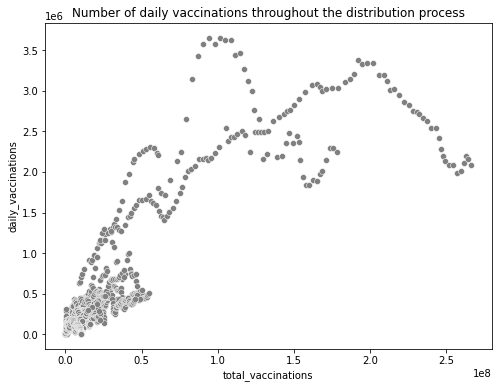

In [ ]:
# Visualizing how "daily_vaccinations" changes when "total_vaccinations" increases
# Graph shows a potential curve can properly discribe the trend
plt.figure(figsize = (8,6))
sns.scatterplot(new_vac_4['total_vaccinations'],new_vac_4['daily_vaccinations'],color= 'grey')
plt.title('Number of daily vaccinations throughout the distribution process')

In [ ]:
# getting the coloumns 
X = np.array(new_vac_4['total_vaccinations']).reshape(new_vac_4.shape[0],1)
y = np.array(new_vac_4['daily_vaccinations'])

# splitting the data in to testing set and training set
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 1)
p = PolynomialFeatures(2)
X_p = p.fit_transform(Xtrain)
model = LinearRegression()
model.fit(X_p,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# printing the r^2 for training set and testing set
print('Training score')
print(model.score(X_p,ytrain))
print('Testing score')
print(model.score(p.fit_transform(Xtest),ytest))
# the line of best fit
print('Regression line')
print('y = ',model.coef_[1],'*x ',model.coef_[2],'*x^2',model.intercept_)

Training score
0.8469434117593273
Testing score
0.8536571440606355
Regression line
y =  0.02732528451314292 *x  -6.657442652713286e-11 *x^2 -31395.893251218135


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Testing set line of best fit')

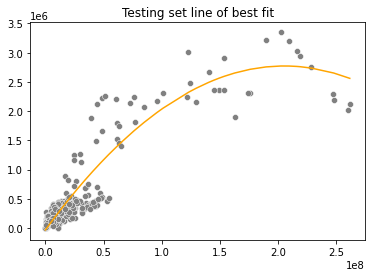

In [ ]:
# The best fit line on a scatterplot for the testing set
sns.lineplot(x = Xtest[:,0],y = model.predict(p.fit_transform(Xtest)),color = 'orange')
sns.scatterplot(Xtest[:,0],ytest,color= 'grey')
plt.title('Testing set line of best fit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Training set line of best fit')

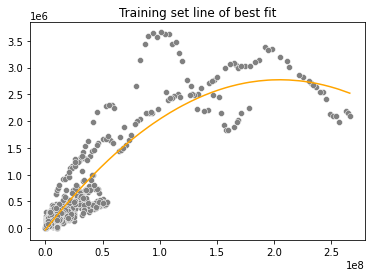

In [ ]:
# The best fit line on a scatterplot for training set
sns.lineplot(x = Xtrain[:,0],y = model.predict(p.fit_transform(Xtrain)),color = 'orange')
sns.scatterplot(Xtrain[:,0],ytrain,color= 'grey')
plt.title('Training set line of best fit')

## Machine Learning 2 part 1


In [ ]:
# Machine Learning 2
# Let's try the complete dataset first, despite it being skewed 
# new_vac_3 will be used 

# number of data from China and not from China
print(new_vac_3['China_dm'].value_counts())
# average number of daily administered vaccines in China
print('========= China =========')
print(new_vac_3[new_vac_3['China_dm'] == 1]['daily_vaccinations'].mean())
# averaege number of daily administered vaccines in other countries
print('========= Other countries =========')
print(new_vac_3[new_vac_3['China_dm'] == 0]['daily_vaccinations'].mean())
# getting the columns needed
X_2 = np.array(new_vac_3['daily_vaccinations']).reshape(new_vac_3.shape[0],1)
y_2 = np.array(new_vac_3['China_dm'])
# splitting the data into training and testing set
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X_2,y_2)
tree_model = tree.DecisionTreeClassifier(max_depth=1) 
tree_model = tree_model.fit(Xtrain2, ytrain2)

0    2231
1      52
Name: China_dm, dtype: int64
========= China =========
5029232.673076923
========= Other countries =========
361564.84356790676


[Text(167.4, 163.07999999999998, 'X[0] <= 3703893.0\ngini = 0.041\nsamples = 1712\nvalue = [1676, 36]'),
 Text(83.7, 54.360000000000014, 'gini = 0.009\nsamples = 1684\nvalue = [1676, 8]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]')]

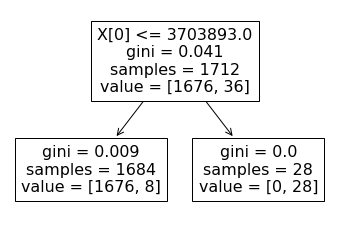

In [ ]:
tree.plot_tree(tree_model)

Text(0.5, 1.0, 'ROC curve')

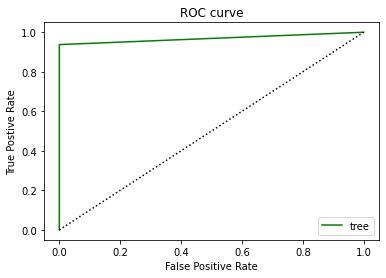

In [ ]:
# ROC curve 
fpr_tree,tpr_tree,thresholds_tree = metrics.roc_curve(ytest2,tree_model.predict_proba(Xtest2)[:,1])
plt.plot(fpr_tree,tpr_tree,label='tree',color = 'green')
plt.plot([0,1],[0,1],color = [0,0,0],linestyle = ':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.legend()
plt.title('ROC curve')

In [ ]:
# Using K-Fold to cross validate the decision tree model
# defining the tree model
kfold = model_selection.KFold(n_splits=10) 
# shoing the accuracy of each fold
acc = model_selection.cross_val_score(tree_model,X_2,y_2,cv=kfold,scoring= 'accuracy')
# returning the mean accuracy
print('Accuracy')
print(acc.mean())
f1_scores = model_selection.cross_val_score(tree_model,X_2,y_2,cv=kfold,scoring= 'f1')
print('F1 score')
print(f1_scores.mean())

Accuracy
0.9733624454148473
F1 score
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMe

In [ ]:
results = model_selection.cross_validate(tree_model, X_2, y_2, cv=kfold,return_train_score=True,scoring=('f1','accuracy'))
results['test_f1']

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMe

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Machine Learning 2 part 2

In [ ]:
# Machine Learning 2 part 2
# new_vac_5, the dataset that only contains part of the rows that are not form china, will be used 
# number of data from China and not from China
print(new_vac_5['China_dm'].value_counts())
# average number of daily administered vaccines in China
print('========= China =========')
print(new_vac_5[new_vac_5['China_dm'] == 1]['daily_vaccinations'].mean())
# averaege number of daily administered vaccines in other countries
print('========= Other countries =========')
print(new_vac_5[new_vac_5['China_dm'] == 0]['daily_vaccinations'].mean())

0    156
1     52
Name: China_dm, dtype: int64
========= China =========
5029232.673076923
========= Other countries =========
345711.3717948718


In [ ]:
# getting the columns needed
X_2 = np.array(new_vac_5['daily_vaccinations']).reshape(new_vac_5.shape[0],1)
y_2 = np.array(new_vac_5['China_dm'])
# splitting the data into training and testing set
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X_2,y_2)
tree_model = tree.DecisionTreeClassifier(max_depth=1) 
tree_model = tree_model.fit(Xtrain2, ytrain2)

[Text(167.4, 163.07999999999998, 'X[0] <= 3237469.5\ngini = 0.362\nsamples = 156\nvalue = [119, 37]'),
 Text(83.7, 54.360000000000014, 'gini = 0.048\nsamples = 122\nvalue = [119, 3]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]')]

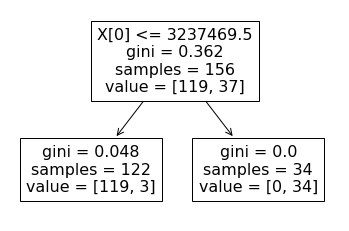

In [ ]:
# visualizing the criterion of the decision tree model 
tree.plot_tree(tree_model)

Text(0.5, 1.0, 'ROC curve')

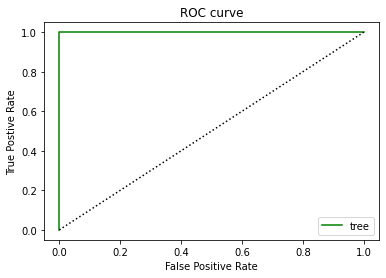

In [ ]:
# ROC curve 
fpr_tree,tpr_tree,thresholds_tree = metrics.roc_curve(ytest2,tree_model.predict_proba(Xtest2)[:,1])
plt.plot(fpr_tree,tpr_tree,label='tree',color = 'green')
plt.plot([0,1],[0,1],color = [0,0,0],linestyle = ':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.legend()
plt.title('ROC curve')

In [ ]:
# Using K-Fold to cross validate the decision tree model
# defining the tree model
kfold = model_selection.KFold(n_splits=10) 
# shoing the accuracy of each fold
acc = model_selection.cross_val_score(tree_model,X_2,y_2,cv=kfold,scoring= 'accuracy')
# returning the mean accuracy
print('Accuracy')
print(acc.mean())
f1_scores = model_selection.cross_val_score(tree_model,X_2,y_2,cv=kfold,scoring= 'f1')
print('F1 score')
print(f1_scores.mean())

Accuracy
0.980952380952381
F1 score
0.29230769230769227


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMe

In [ ]:
# f1 score of each fold
# certain trials return good f1 scores
results = model_selection.cross_validate(tree_model, X_2, y_2, cv=kfold,return_train_score=True,scoring=('f1','accuracy'))
results['test_f1']

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMe

array([0.92307692, 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

***************
***************
# **Conclusions**

The polynomial regression model
* The analysis looks into distribution of the covid-19 vaccines around the world and looks for generalizable results. 
* The scatterplot of total_vaccinations against daily vaccinations demonstrates a non-linear correlation. Thus, a polynomial regression model is used.
* The model demonstrates a strong correlation between the daily number of vaccinations distributed and the total number of vaccinations distributed, with testing r^2 of 0.85. The total of 2231 eligible data form the Covid-19 vaccination dataset are used in the model (exlcuding data from China). The specific relationship between these two variables is : y =  0.02732528451314292*x -6.657442652713286e-11*x^2 -31395.893251218135 as shown in the machine learning 1 section. (The number would slightly change due to randomization of data selection)
* As intended, the regression equation of the two variables can be used to predict a certain number of doses needed for a specific day given an arbituary total number of vaccinations. This can be helpful for the health department to better prepare for the future time sensitive distribution of vaccines and similar medical products, under the circumstance that the proper technology and communication would not be comprimised, if not imporved. 

The decision tree model 
*  As shown in the raw data, data collected from China contain a lot of missing elements compared to those of other regions and show large discrepancy in daily vaccination numbers as well as total number of vaccinations in comparison to other countries. The reason for this finding may be due to the large population in China and other factors such as policies and differences in vaccine development. Therefore, data from China might not be the most ideal to include in a model that indicates a universal trend. Instead, identifying the unlikely occurances of data can be helpful when getting rid of outliers. 
* In part 1:
* A decision tree model is performed to classify a daily number of administered vaccine doses into either of two groups which are "China" and "not China". If the data point is classified into the China group, it indicates that the daily vaccination number is likkely collected from China or sits outside of the norms of daily vaccinations. If classified into the group "not China", the data are not from China and likely belong to the group of non-outliners. The total of 2283 eligible data form the Covid-19 vaccination dataset are used to generate the model.
* The tree model, with the depth of 1, predicts the classification of the data. In the model, the daily vaccinations under or equal to 3781107 is seen as part of the group "not China", the daily vaccinations larger than 3781107 are put in the group "China". The criterion would change due to randomization of data selection. However, the cross validation done after the tree model suggests that the results form the tree model is reliable and generalization, though not specific to the number 3781107.
* After cross validation,the mean accuracy of the K-Fold model is more than 97%. However, the mean F1 score is 0 and demostrates that the model might be underfitting and the data is too skewed.
* In part 2:
* The tree model, with the depth of 1, predicts the classification of the data. The threshhold is similar to part 1.
* After cross validation, the mean accuracy of the K-Fold model is more than 97%. However, the mean F1 score is around 0.3.
* First interpretation: Combining the results of two parts, we can conclude that the low F1 score results from the rare case of true positives since there are not many the cases where we get a row of data that is labelled "China" (or 1 if dummy coded). Therefore, the socre of accuracy is more valuable in terms of getting the information about the model. However, more data should be included in the future to further examine the pattern.    
* Second interpretion: since the main concern of this model is true positives and true negatives,instead of false negatives and false positives, F1 scores are not as crucial as accuracy.   

All in all, the findings of both analysis are consistent with the assumptions. First, "Total vaccinations" and "Daily Vaccination" have a non-linear correlation(degree = 2) and the quadratic curve mentioned above is able to fit the data. Second, the decision tree model's prediction based on "daily vaccinations" has significant results and predicts potential outliers very well. In addition, the high accuracy suggested by the K-Fold validation implies the disconnnection between data from China and data from other regions.


# **Discussion and some issues**
The exclusion of data collected from China can be justified in the polynomial regression model.
* From the visualization 7 in the visualization section, without the data from China, the data presents a downward "U" shape, indicating that the daily number of vaccines distributed goes down as the total number reach to a certain point. Intuitively, the model is more accurate because as more people get vaccinated, the need for vaccines would decrease. However, with data from China, the shape of the plot changes to a upward trend. As mentioned in the introduction, population in China is significantly larger than most other countries and the process of vaccine distribution might look a lot different. 
* Another analysis on China's model of vaccine rollout can be useful to compare the diffences.

The decision tree model returns very high accuracy but low F1 score
* The specific reason for the inconsistence of these two scores is not fully discussed or investigated in the project. 
* To avoid manipulating the data and the result, I did not explore more possibilities of feature engineering to improve the f1 score.